Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

We will start by importing the necessary libraries

In [4]:
%matplotlib inline
import nsfg
import thinkstats2
import thinkplot
import numpy as np
from math import sqrt, pow

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Taking into account jitter and by using thinkplot's API we can 

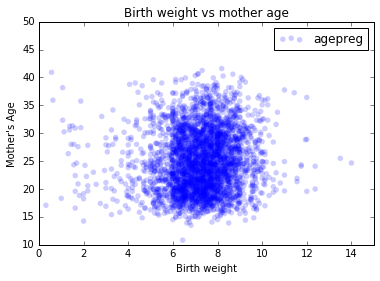

In [5]:
# define DataFrame
df = nsfg.ReadFemPreg()

# Random 5000 rows
sample = thinkstats2.SampleRows(df, 5000)

# Define birth_weight and age
birth_weight, age = sample.totalwgt_lb, sample.agepreg

weight_jitter = thinkstats2.Jitter(birth_weight, 0.5)
thinkplot.Scatter(birth_weight, age)
thinkplot.Show(title="Birth weight vs mother age",
               xlabel = "Birth weight",
               ylabel = "Mother's Age",
               axis = [0, 15, 10, 50])

Pearson Corr, 0.0688339703541
Spearman Corr, 0.0946100410966


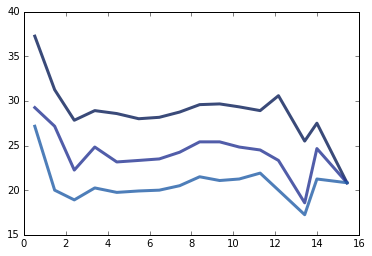

In [6]:
df = df.dropna(subset=['totalwgt_lb','agepreg'])
bins = np.arange(0,20,1)
indices = np.digitize(df.totalwgt_lb,bins)
groups = df.groupby(indices)

weights = [group.totalwgt_lb.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.agepreg) for i, group in groups]
    
for percent in [75, 50, 25]:
    ages = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(weights,ages,label=label)

print "Pearson Corr,", thinkstats2.Corr(df.totalwgt_lb, df.agepreg)
print "Spearman Corr,", thinkstats2.SpearmanCorr(df.totalwgt_lb, df.agepreg)